In [3]:
import os
import sys
import csv                                                      
import networkx as nx
from operator import itemgetter
import community
import matplotlib.pyplot as plt
import numpy as np

In [7]:
module_path = os.path.abspath(os.path.join('..'))
src_path = '{}/src'.format(module_path)
if module_path not in sys.path:
    sys.path.append(src_path)

c_elegans_undir_names_path = '{}/data/c_elegans_undir_names.txt'.format(module_path)
c_elegans_undir_path = '{}/data/c_elegans_undir.net'.format(module_path)

Leitura do arquivo c_elegans_undir_names

In [38]:
with open(c_elegans_undir_names_path, 'r') as celenamenet:
    nodereader = celenamenet.read()
    node_names = [n.split(' ')[1] for n in nodereader.split('\n')[:-1]]

Leitura do arquivo c_elegans_undir

In [42]:
with open(c_elegans_undir_path, 'r') as celenet:
    edgereader = celenet.read()
    edges = [tuple(n.split(' ')) for n in edgereader.split('\n')[:-1]]

Imprime a quantidade de cada um

In [45]:
print(len(node_names))  
print(len(edges))                                                                               

G = nx.Graph() # inicializando o grafo                                                   
G.add_nodes_from(node_names) # cria os nós                           
G.add_edges_from(edges) # adiciona as arestas no grafo  
print(nx.info(G)) # imprime informações do grafo (resumo)

density = nx.density(G)
print('Densidade da rede: ', density)

#fell_whitehead_path = nx.shortest_path(G, source='ADAL',target='AIYL')
#print('Menor caminho entre Fell e Whitehead: ', fell_whitehead_path)

279
2287
Name: 
Type: Graph
Number of nodes: 558
Number of edges: 2287
Average degree:   8.1971
Densidade da rede:  0.014716575613083403


Grafo é conexo?

In [46]:
print(nx.is_connected(G))

False


Obtém os componentes do grafo

In [47]:
components = nx.connected_components(G)
print(components)

<generator object connected_components at 0x7fd35c4a8660>


Obtém o maior componente

In [48]:
largest_component = max(components, key=len)
print(largest_component)

{'225', '26', '112', '27', '155', '79', '160', '211', '172', '274', '145', '161', '239', '14', '36', '124', '12', '117', '22', '255', '10', '57', '169', '20', '109', '238', '30', '32', '104', '207', '254', '68', '164', '218', '85', '219', '273', '87', '58', '126', '23', '265', '149', '195', '163', '125', '253', '205', '11', '191', '121', '221', '4', '210', '93', '269', '45', '61', '84', '107', '186', '249', '192', '168', '252', '176', '229', '63', '209', '184', '226', '198', '31', '94', '48', '70', '146', '214', '278', '144', '220', '73', '245', '170', '74', '99', '52', '243', '59', '89', '66', '189', '242', '113', '196', '147', '148', '130', '101', '256', '39', '150', '100', '102', '227', '44', '95', '276', '110', '64', '13', '165', '162', '88', '153', '259', '261', '81', '90', '116', '67', '42', '222', '15', '35', '271', '123', '127', '247', '159', '241', '103', '204', '230', '216', '257', '158', '263', '181', '156', '215', '41', '166', '69', '177', '1', '7', '131', '134', '133', '55

Diâmetro do maior componente

In [49]:
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print('Diâmetro do maior componente: ', diameter)

Diâmetro do maior componente:  5


Obtém o grau dos nós

In [50]:
degree_dict = dict(G.degree(G.nodes()))
print(degree_dict)
#nx.set_node_attributes(G, degree_dict, 'degree')
#print(G.node['William Penn'])

{'ADAL': 0, 'ADAR': 0, 'ADEL': 0, 'ADER': 0, 'ADFL': 0, 'ADFR': 0, 'ADLL': 0, 'ADLR': 0, 'AFDL': 0, 'AFDR': 0, 'AIAL': 0, 'AIAR': 0, 'AIBL': 0, 'AIBR': 0, 'AIML': 0, 'AIMR': 0, 'AINL': 0, 'AINR': 0, 'AIYL': 0, 'AIYR': 0, 'AIZL': 0, 'AIZR': 0, 'ALA': 0, 'ALML': 0, 'ALMR': 0, 'ALNL': 0, 'ALNR': 0, 'AQR': 0, 'AS01': 0, 'AS10': 0, 'AS11': 0, 'AS02': 0, 'AS03': 0, 'AS04': 0, 'AS05': 0, 'AS06': 0, 'AS07': 0, 'AS08': 0, 'AS09': 0, 'ASEL': 0, 'ASER': 0, 'ASGL': 0, 'ASGR': 0, 'ASHL': 0, 'ASHR': 0, 'ASIL': 0, 'ASIR': 0, 'ASJL': 0, 'ASJR': 0, 'ASKL': 0, 'ASKR': 0, 'AUAL': 0, 'AUAR': 0, 'AVAL': 0, 'AVAR': 0, 'AVBL': 0, 'AVBR': 0, 'AVDL': 0, 'AVDR': 0, 'AVEL': 0, 'AVER': 0, 'AVFL': 0, 'AVFR': 0, 'AVG': 0, 'AVHL': 0, 'AVHR': 0, 'AVJL': 0, 'AVJR': 0, 'AVKL': 0, 'AVKR': 0, 'AVL': 0, 'AVM': 0, 'AWAL': 0, 'AWAR': 0, 'AWBL': 0, 'AWBR': 0, 'AWCL': 0, 'AWCR': 0, 'BAGL': 0, 'BAGR': 0, 'BDUL': 0, 'BDUR': 0, 'CEPDL': 0, 'CEPDR': 0, 'CEPVL': 0, 'CEPVR': 0, 'DA01': 0, 'DA02': 0, 'DA03': 0, 'DA04': 0, 'DA05': 0,

Ontem apenas o grau do nó

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 22, 29, 10, 21, 34, 39, 20, 93, 75, 74, 44, 55, 55, 29, 9, 16, 23, 14, 30, 25, 24, 29, 17, 28, 16, 24, 18, 17, 22, 92, 31, 24, 31, 16, 16, 23, 18, 14, 9, 8, 2

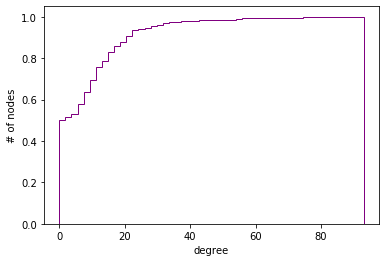

<Figure size 432x288 with 0 Axes>

In [51]:
values = list()
for key in degree_dict.keys():
    values.append(degree_dict[key])

print(values)
'''
plt.hist(values, bins=15)
plt.ylabel('# of nodes')
plt.xlabel('degree')
plt.show()
plt.savefig('degree_distribution.png')
'''
plt.hist(values, bins=50, density=1,
cumulative=True, label='CDF DATA',
histtype='step', color='purple')
plt.ylabel('# of nodes')
plt.xlabel('degree')
plt.show()
plt.savefig('degree_cdf.png')